# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
#多項式回歸 - polynominal linear regression

# 0~5間 生成100個點
x = np.linspace(0, 5, 100)

#用sin生成彎彎曲曲的線
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

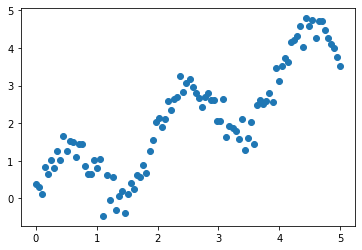

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
#設定函式
regr_lin = LinearRegression()

In [5]:
#轉2維
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
#把xy丟丟進去
regr_lin.fit(X,y)

LinearRegression()

0.565582234378219


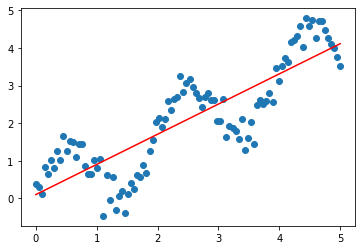

In [8]:
#預測的點"Y"出來了
Y=regr_lin.predict(X)

#原始資料
plt.scatter(x,y)

#預測資料
plt.plot(x,Y , color='r')

#MSE數據
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [9]:
print(x.shape)

(100,)


In [12]:
#增加成多項式 - X有100個維度，且每筆資料都有5筆資料
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)
# print(X_poly)

(100, 5)


In [14]:
#設定函式
regr_poly = LinearRegression()

In [15]:
#把新維度的X資料和Y丟進模型訓練
regr_poly.fit(X_poly, y)

LinearRegression()

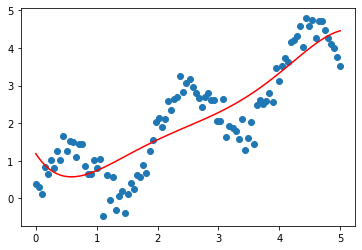

In [16]:
#最後把它畫成圖

#原始
plt.scatter(x,y)

#新預測
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [17]:
#斜率和截距 - 跟之前不一樣的是，斜率有5個
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-2.48244062  3.16530485 -1.39298362  0.2795855  -0.02050217]
interception:  1.1865391574177742


In [18]:
#方法一 : 
W=regr_poly.coef_
b=regr_poly.intercept_

#要讓兩個矩陣可以相乘 - 必須要做轉矩陣的動作
np.dot(X_poly,W.T)+b

array([1.18653916, 1.06905966, 0.96667658, 0.87837767, 0.80319274,
       0.74019281, 0.68848936, 0.64723343, 0.61561493, 0.59286173,
       0.5782389 , 0.57104789, 0.57062573, 0.57634421, 0.58760908,
       0.60385923, 0.6245659 , 0.64923186, 0.67739059, 0.70860551,
       0.74246911, 0.77860222, 0.81665312, 0.85629679, 0.89723409,
       0.93919093, 0.98191747, 1.02518733, 1.06879677, 1.11256387,
       1.15632773, 1.19994767, 1.24330242, 1.28628929, 1.32882339,
       1.3708368 , 1.41227778, 1.45310996, 1.49331149, 1.5328743 ,
       1.57180325, 1.61011531, 1.64783879, 1.68501251, 1.72168497,
       1.7579136 , 1.79376389, 1.82930861, 1.86462702, 1.89980402,
       1.93492936, 1.97009685, 2.00540352, 2.04094885, 2.07683391,
       2.1131606 , 2.15003081, 2.18754563, 2.22580453, 2.26490457,
       2.30493955, 2.34599926, 2.38816862, 2.43152691, 2.47614691,
       2.52209418, 2.56942614, 2.61819136, 2.6684287 , 2.72016649,
       2.77342176, 2.82819943, 2.88449147, 2.94227609, 3.00151

In [24]:
#方法二 : 直接把X值丟進函數 - 產出預測值
Y_poly = regr_poly.predict(X_poly)
print(Y_poly)

#最後再算出MSE
#MSE數據
mse_poly = np.sum((Y_poly - y)**2) / len(y)

print("====================")
print("mse_poly = " + str(mse_poly))


#算出預測值後，但是結果不是很理想，所以繼續思考有沒有辦法讓MSE再趨近於0一點
#因此決定用統計學的方式來看 - "RBF"

[1.18653916 1.06905966 0.96667658 0.87837767 0.80319274 0.74019281
 0.68848936 0.64723343 0.61561493 0.59286173 0.5782389  0.57104789
 0.57062573 0.57634421 0.58760908 0.60385923 0.6245659  0.64923186
 0.67739059 0.70860551 0.74246911 0.77860222 0.81665312 0.85629679
 0.89723409 0.93919093 0.98191747 1.02518733 1.06879677 1.11256387
 1.15632773 1.19994767 1.24330242 1.28628929 1.32882339 1.3708368
 1.41227778 1.45310996 1.49331149 1.5328743  1.57180325 1.61011531
 1.64783879 1.68501251 1.72168497 1.7579136  1.79376389 1.82930861
 1.86462702 1.89980402 1.93492936 1.97009685 2.00540352 2.04094885
 2.07683391 2.1131606  2.15003081 2.18754563 2.22580453 2.26490457
 2.30493955 2.34599926 2.38816862 2.43152691 2.47614691 2.52209418
 2.56942614 2.61819136 2.6684287  2.72016649 2.77342176 2.82819943
 2.88449147 2.94227609 3.00151699 3.06216248 3.12414472 3.18737887
 3.25176234 3.31717391 3.383473   3.45049878 3.51806943 3.58598129
 3.65400807 3.72190004 3.7893832  3.8561585  3.92190105 3.98625

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [25]:
#常態分佈 - 給這個函數平均值和標準差，就可以得到一個數 K 
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [26]:
sigma = 0.3

In [27]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [28]:
regr_rbf = LinearRegression()

In [29]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

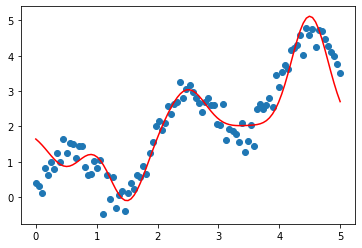

In [30]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [31]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-1.02348521 -1.99871805  1.14754954  0.1134646   3.21360028]
interception:  1.9013007437198224


#### Comparison

In [32]:
#三個方法做比較
Y_lin = regr_lin.predict(X) 
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

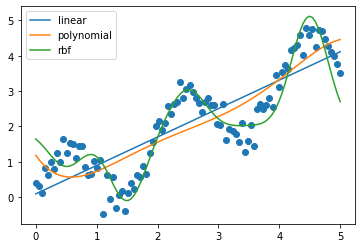

In [33]:
#把三個方法分別不同預測的值畫出來

plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [34]:
#方法一的MSE
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.565582234378219


In [35]:
#方法二 - POLY的MSE
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.49300192046795316


In [36]:
#方法三 - RBF的MSE
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.22388731680073876


In [ ]:
#RBF的方法，不會造成overfitting嗎